In [1]:
!pip install pysal


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     --------- ------------------------------ 1.3/5.7 MB 7.4 MB/s eta 0:00:01
     ------------------ --------------------- 2.6/5.7 MB 6.3 MB/s eta 0:00:01
     ----------------------------- ---------- 4.2/5.7 MB 6.6 MB/s eta 0:00:01
     ------------------------------------ --- 5.2/5.7 MB 6.6 MB/s eta 0:00:01
     ---------------------------------------- 5.7/5.7 MB 6.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 

In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\adm1\OneDrive - USherbrooke\Documents\memoire\py_madaclim\workdir\input\gbif_mada_available_caff_content_w_caffeine.csv")
df.drop(['specimen_id'], axis=1, inplace=True)
df

,longitude,latitude,caffeine_percent
0,43.797500,-22.875000,0.00
1,50.041667,-14.101389,0.03
2,46.333889,-24.560833,0.00
3,46.333889,-24.560833,0.00
4,46.333889,-24.560833,0.00
...,...,...,...
521,47.000000,-23.000000,0.00
522,48.700000,-13.580000,0.00
523,49.700000,-13.180000,0.00
524,49.700000,-13.180000,0.00


In [3]:
import geopandas as gpd
from libpysal.weights import DistanceBand

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create a distance-based spatial weights matrix (e.g., 500km threshold)
w = DistanceBand.from_dataframe(gdf, threshold=500, binary=True)


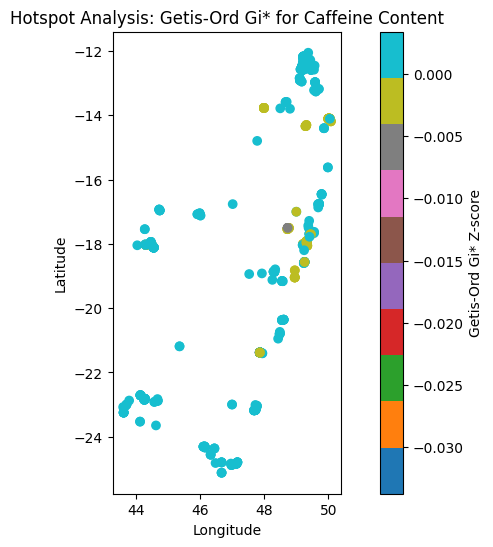

In [11]:
import geopandas as gpd
import pandas as pd
from libpysal.weights import DistanceBand
from esda.getisord import G_Local
import matplotlib.pyplot as plt


# Perform Getis-Ord Gi* (local) analysis
g_star_local = G_Local(gdf['caffeine_percent'], w)

# Extract Z-scores from the result
gdf['Gi*'] = g_star_local.Zs  # These are the Z-scores for hot/cold spots

# Plot the Z-scores to visualize hotspots
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='Gi*', ax=ax, legend=True, cmap='tab10', 
         legend_kwds={'label': "Getis-Ord Gi* Z-score"})

plt.title("Hotspot Analysis: Getis-Ord Gi* for Caffeine Content")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



In [12]:
from esda.moran import Moran_Local
from splot.esda import plot_moran_local

moran_local = Moran_Local(gdf['caffeine_percent'], w)
plot_moran_local(moran_local, gdf, p=0.05)
plt.title("Local Moran's I: Caffeine Content Clustering")
plt.show()


ImportError: cannot import name 'plot_moran_local' from 'splot.esda' (c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\splot\esda.py)

C:\Users\adm1\AppData\Local\Temp\ipykernel_71736\751393209.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=gdf['longitude'], y=gdf['latitude'], shade=True, cmap='coolwarm')
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


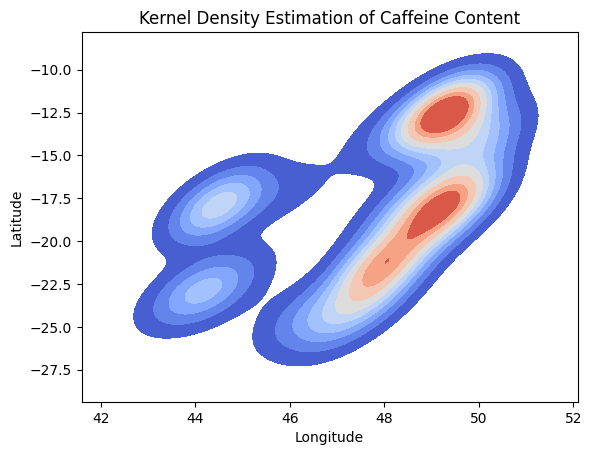

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot KDE for caffeine content based on longitude and latitude
sns.kdeplot(x=gdf['longitude'], y=gdf['latitude'], shade=True, cmap='coolwarm')

plt.title("Kernel Density Estimation of Caffeine Content")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



In [ ]:
import geopandas as gpd
from esda.moran import Moran_Local
from libpysal.weights import DistanceBand
import matplotlib.pyplot as plt

# Example DataFrame with longitude, latitude, and caffeine content
data = {
    'longitude': [43.5, 44.0, 45.0, 46.5],
    'latitude': [-25.0, -23.5, -20.5, -18.0],
    'caffeine_percent': [0.8, 0.5, 0.9, 1.1]
}

df = pd.DataFrame(data)

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Create spatial weights matrix (500 km distance threshold)
w = DistanceBand.from_dataframe(gdf, threshold=500, binary=True)

# Perform Local Moran's I
moran_local = Moran_Local(gdf['caffeine_percent'], w)

# Add Local Moran's I results to the GeoDataFrame
gdf['Is'] = moran_local.Is  # Local Moran's I values
gdf['p_sim'] = moran_local.p_sim  # P-values for significance
gdf['significant'] = gdf['p_sim'] < 0.05  # Boolean for significant areas

# Plot the Local Moran's I values (clusters of similarity)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column='Is', ax=ax, cmap='coolwarm', legend=True,
         legend_kwds={'label': "Local Moran's I"})
plt.title("Local Moran's I for Caffeine Content")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
!pip install splot esda libpysal

#"C:\Users\adm1\OneDrive - USherbrooke\Documents\memoire\data\madadata\gadm41_MDG_0.shp"

C:\Users\adm1\AppData\Local\Temp\ipykernel_71736\2734286857.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['longitude'], y=df['latitude'],
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\adm1\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


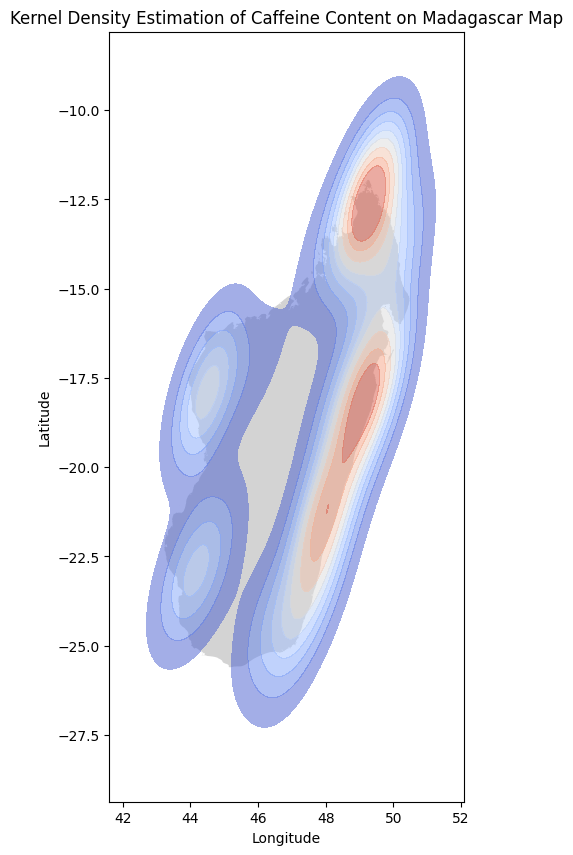

In [16]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Madagascar shapefile (assuming you have it as 'madagascar.shp')
# Replace with the path to your shapefile
madagascar = gpd.read_file(r"C:\Users\adm1\OneDrive - USherbrooke\Documents\memoire\data\madadata\gadm41_MDG_0.shp")

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Madagascar basemap
madagascar.plot(ax=ax, color='lightgray')

# Plot KDE for the caffeine content based on longitude and latitude
sns.kdeplot(x=df['longitude'], y=df['latitude'], 
            shade=True, cmap='coolwarm', ax=ax, alpha=0.5)

# Set the title and labels
plt.title("Kernel Density Estimation of Caffeine Content on Madagascar Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()


C:\Users\adm1\AppData\Local\Temp\ipykernel_71736\3885981504.py:29: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  clipped = gpd.clip(grid_gdf, madagascar)


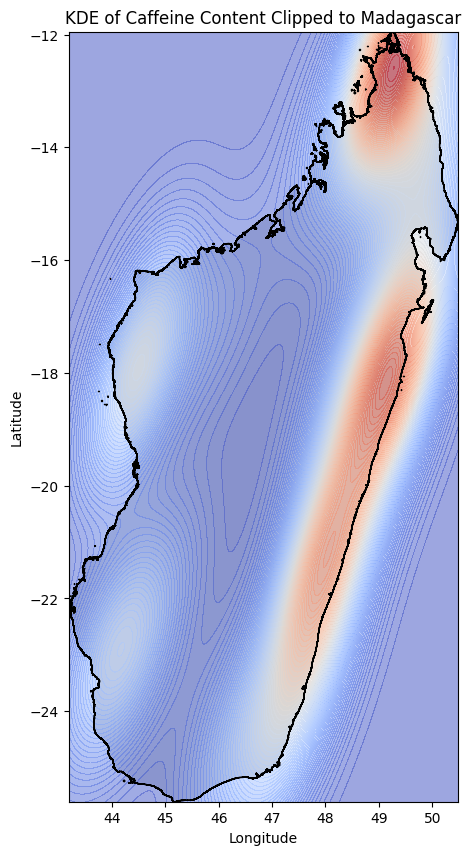

In [17]:
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
from scipy.stats import gaussian_kde

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the Madagascar basemap
madagascar.plot(ax=ax, color='lightgray')

# Create grid points over the map area (covering the extent of Madagascar)
x_grid = np.linspace(madagascar.total_bounds[0], madagascar.total_bounds[2], 500)
y_grid = np.linspace(madagascar.total_bounds[1], madagascar.total_bounds[3], 500)
X, Y = np.meshgrid(x_grid, y_grid)
grid_points = np.vstack([X.ravel(), Y.ravel()])

# Calculate KDE using scipy's gaussian_kde
kde = gaussian_kde(np.vstack([df['longitude'], df['latitude']]))
Z = kde(grid_points).reshape(X.shape)

# Create a GeoDataFrame from grid points
grid_geom = [Point(x, y) for x, y in zip(X.ravel(), Y.ravel())]
grid_gdf = gpd.GeoDataFrame(geometry=grid_geom)

# Clip the KDE to the Madagascar boundary
clipped = gpd.clip(grid_gdf, madagascar)

# Plot the KDE within Madagascar's boundaries
ax.contourf(X, Y, Z, levels=100, cmap='coolwarm', alpha=0.5)

# Plot the Madagascar map boundaries again to make sure they're on top
madagascar.boundary.plot(ax=ax, linewidth=1, color='black')

# Set title and labels
plt.title("KDE of Caffeine Content Clipped to Madagascar")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show the plot
plt.show()
